## 1. Get data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd

/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_50952/1201507386.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### resolve back index

In [2]:
n_series = [15, 20, 25, 30, 40, 50, 70, 100, 150, 200, 250, 300]
n_totals = [5000, 10000, 15000, 20000, 25000, 30000, 35000]
bs = [0.7, 1.0, 1.3]

all_permutations = [
    i
    for i in it.product(
        n_series,
        n_totals,
        bs,
    )
]
all_permutations = np.array(all_permutations)

# parameter vectors to run through with cl_idx
cl_n_series = all_permutations[:, 0].astype(int)
cl_n_totals = all_permutations[:, 1].astype(int)
cl_bs = all_permutations[:, 2]

def get_string_data(cutting, transform, cl_idx):
    if cutting == "constant_idx":
        save_str = (
            "results/distributions/cutting_" + str(cutting) + "/"
            "acf_mean_" + str(cl_idx) + ".csv"
        )
    else:
        save_str = (
            "results/distributions/cutting_"
            + str(cutting)
            + "/transform_"
            + str(transform)
            + "/"
            "acf_mean_" + str(cl_idx) + ".csv"
        )
    return save_str


def get_df(cutting, transform):
    all_acfs = []
    all_n_series = []
    all_n_series_used = []
    all_bs = []
    all_n_totals = []

    for cl_idx in range(len(cl_n_series)):
        cl_idx = 0 # for now

        save_str = get_string_data(cutting, transform, cl_idx)

        acfs = np.genfromtxt('../'+save_str, delimiter=',')
        n_series_used = np.genfromtxt('../'+save_str.replace("acf_mean", "n_used_mean"), delimiter=',')
        all_acfs.extend(acfs)
        all_n_series_used.extend(n_series_used)
        all_n_series.extend([cl_n_series[cl_idx]]*len(acfs))
        all_bs.extend([cl_bs[cl_idx]]*len(acfs))
        all_n_totals.extend([cl_n_totals[cl_idx]]*len(acfs))

    # make a dataframe
    df = pd.DataFrame({
        "acf": all_acfs,
        "n_series": all_n_series,
        #"n_series_used": all_n_series_used,
        "b": all_bs,
        "n_total": all_n_totals,
    })
    return df

## Constant index

In [3]:
cutting = "constant_idx"
transform = False

df = get_df(cutting, transform)

In [4]:
df

,acf,n_series,b,n_total
0,0.001382,15,0.7,5000
1,-0.027542,15,0.7,5000
2,-0.204623,15,0.7,5000
3,-0.126172,15,0.7,5000
4,0.039700,15,0.7,5000
...,...,...,...,...
12595,-0.364446,15,0.7,5000
12596,0.068523,15,0.7,5000
12597,-0.221967,15,0.7,5000
12598,-0.105571,15,0.7,5000


In [26]:
# n_series_used
grouped_mean = df.groupby('n_series_used').mean()
grouped_std = df.groupby('n_series_used').std()

-0.3587865218553115


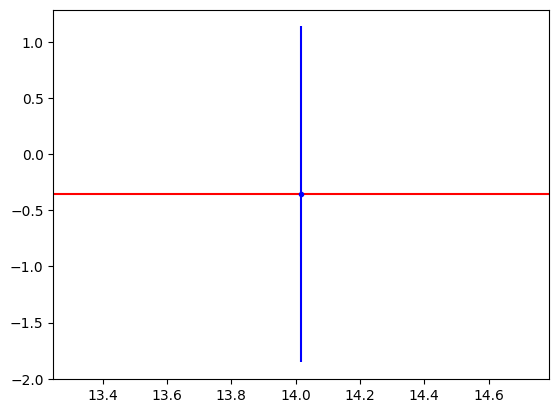

In [27]:
# here, I estimate the std
x = grouped_mean.index
normalized = grouped_mean['acf'].values *(x*np.sqrt(x-1))/(x-2)
normalized_std = grouped_std['acf'].values*(x*np.sqrt(x-1))/(x-2)

plt.errorbar(grouped_mean.index, normalized, yerr=2*normalized_std,color='blue', marker='o', linestyle='', markersize=3)

weighted_least_squares = np.sum(normalized / normalized_std**2) / np.sum(1 / normalized_std**2)
plt.axhline(y=weighted_least_squares, color='red')

print(weighted_least_squares)

In [28]:
# b
grouped_mean = df.groupby('b').mean()
grouped_std = df.groupby('b').std()

In [29]:
# n_series
grouped_mean = df.groupby('n_series').mean()
grouped_std = df.groupby('n_series').std()

In [30]:
# n_total
grouped_mean = df.groupby('n_total').mean()
grouped_std = df.groupby('n_total').std()

## Random_idx

In [5]:
cutting = "random_idx"
transform = True

df = get_df(cutting, transform)

FileNotFoundError: ../results/distributions/cutting_random_idx/transform_True/n_used_mean_0.csv not found.